In [8]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [9]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.05,random_state=42)

In [10]:
X

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

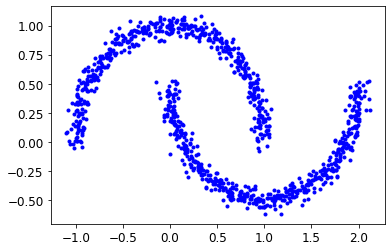

In [11]:
plt.plot(X[:,0],X[:,1],'b.')

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [13]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [44]:
dbscan1 = DBSCAN(eps=0.1,min_samples=5)
dbscan1.fit(X)

DBSCAN(eps=0.1)

In [47]:
dbscan2 = DBSCAN(eps=0.15,min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.15)

In [15]:
def plot_dbscan(dbscan,X,size,show_xlabels=True,show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:,0],cores[:,1],
                c=dbscan.labels_[core_mask],marker='o',s=size,cmap='Paired')
    plt.scatter(cores[:,0],cores[:,1],
                c=dbscan.labels_[core_mask],marker='*',s=20,cmap='Paired')    
    plt.scatter(anomalies[:,0],anomalies[:,1],marker='x',c='r',s=100) 
    plt.scatter(non_cores[:,0],non_cores[:,1],
                c=dbscan.labels_[non_core_mask],marker='.')
    if show_xlabels:
        plt.xlabel('$x_1$',fontsize=14)
    else:
         plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel('$x_2$',fontsize=14)
    else:
         plt.tick_params(labelbottom='off')
    
    plt.title('eps={:.2f},min_samples={}'.format(dbscan.eps,dbscan.min_samples),fontsize=14)

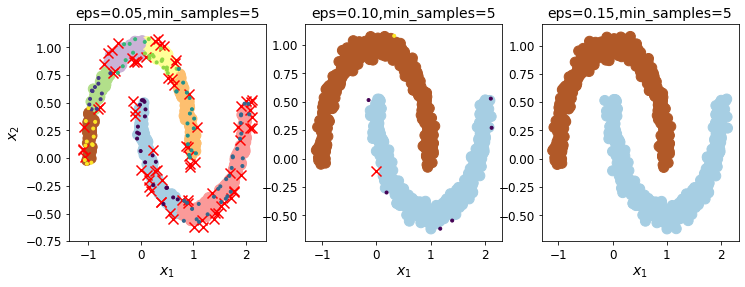

In [48]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plot_dbscan(dbscan,X,size=100)

plt.subplot(132)
plot_dbscan(dbscan1,X,size=100,show_ylabels=False)

plt.subplot(133)
plot_dbscan(dbscan2,X,size=100,show_ylabels=False)

plt.show()

当n_clusters == 1，所有点都在同一群集中时，不定义轮廓分数
- 会出现报错‘ Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)’

In [42]:
from sklearn.metrics import silhouette_score

dbscan3 = DBSCAN(eps=0.1,min_samples=5).fit(X)
silhouette_score(X,dbscan3.labels_)*100

5.496453294743329

In [19]:
np.unique(dbscan3.labels_)

array([-1,  0,  1], dtype=int64)

In [40]:
dbscan_per_eps = [DBSCAN(eps=r/100,min_samples=5).fit(X) for r in range(5,35,5)] 
dbscan_per_eps

[DBSCAN(eps=0.05),
 DBSCAN(eps=0.1),
 DBSCAN(eps=0.15),
 DBSCAN(eps=0.2),
 DBSCAN(eps=0.25),
 DBSCAN(eps=0.3)]

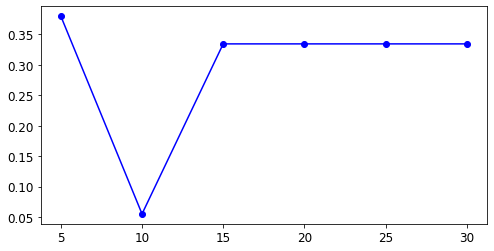

In [43]:
from sklearn.metrics import silhouette_score
dbscan_per_eps = [DBSCAN(eps=r/100,min_samples=5).fit(X) for r in range(5,35,5)] 
silhouette_scores = [silhouette_score(X,model.labels_) for model in dbscan_per_eps]

plt.figure(figsize=(8,4))
plt.plot(range(5,35,5),silhouette_scores,'bo-')
plt.show()